Total points for this HW: 100.
Due date: 02/20/2020 (at the start of class)

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

We use decision trees when we want our model to be interpretable where we know which variables and what values is used to split the data and predict outcome. In decision trees there can be a chance of overfitting. One example of real world urban problem using decision trees is prediction of crime. Here we want a clear picture and a set of decision steps such as considering only relevant areas where crime occurs. Hence, we use decision trees.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

We use random forest when we care more about accuracy than interpretability. A random forest is like a black box where we specify the number of trees we want in our forest and maximum number of features to be used in each tree. We cannot control which feature is part of which tree and the randomness. One example of real life urban problem is prediction of incidences of novel corona virus in US cities where accuracy is crucial for public health authorities. The features which can be considered here are numbers of confirmed cases, total international population in city, population density, travelled to china. 

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

We can post process the model to get interpretability by using methods to calculate variable importance. One way is accuracy based importance where we see the decrease in accuracy score when we exclude a feature. Another method is Gini score. In this we calculate Gini impurity which is used to decide which variable to split at each node and can be used to  to measure  feature relevance

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [39]:
import pandas as pd
import numpy as np

In [40]:
from io import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [328]:
#most common MPG value
df['MPG'].value_counts()

bad     15
good     5
Name: MPG, dtype: int64

In [329]:
#Hence bad is the most common MPG value as it has the highest count

In [330]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [331]:
goodY,badY = 0,0
goodN,badN = 0,0
ig=[]
igval=0

for i in range(0,20):
    if (df.iloc[i]['cylinders'] == 4):
        if df.iloc[i]['MPG'] == 'good':
            goodY=goodY+1
        else:
            badY= badY+ 1
    else:
        if df.iloc[i]['MPG'] == 'good':
            goodN +=1
        else:
            badN += 1
igval = InformationGain(goodY,badY,goodN,badN)
ig.append(igval)       
print("Information Gain for 4", igval)

Information Gain for 4 0.3652938975319328


In [332]:
goodY,badY = 0,0
goodN,badN = 0,0
igval=0

for i in range(0,20):
    if (df.iloc[i]['cylinders'] == 6):
        if df.iloc[i]['MPG'] == 'good':
            goodY=goodY+1
        else:
            badY= badY+ 1
    else:
        if df.iloc[i]['MPG'] == 'good':
            goodN +=1
        else:
            badN += 1
igval = InformationGain(goodY,badY,goodN,badN)
ig.append(igval)       
print("Information Gain for 6", igval)

Information Gain for 6 0.15307795338969116


In [333]:
goodY,badY = 0,0
goodN,badN = 0,0
igval=0

for i in range(0,20):
    if (df.iloc[i]['cylinders'] == 8):
        if df.iloc[i]['MPG'] == 'good':
            goodY=goodY+1
        else:
            badY= badY+ 1
    else:
        if df.iloc[i]['MPG'] == 'good':
            goodN +=1
        else:
            badN += 1
igval = InformationGain(goodY,badY,goodN,badN)
ig.append(igval)       
print("Information Gain for 8", igval)

Information Gain for 8 0.1225562489182657


In [334]:
goodY,badY = 0,0
goodN,badN = 0,0
igval=0

for i in range(0,20):
    if (df.iloc[i]['weight'] == 'light'):
        if df.iloc[i]['MPG'] == 'good':
            goodY=goodY+1
        else:
            badY= badY+ 1
    else:
        if df.iloc[i]['MPG'] == 'good':
            goodN +=1
        else:
            badN += 1
igval = InformationGain(goodY,badY,goodN,badN)
ig.append(igval)       
print("Information Gain for light", igval)

Information Gain for light 0.09710717945150363


In [335]:
goodY,badY = 0,0
goodN,badN = 0,0
igval=0

for i in range(0,20):
    if (df.iloc[i]['weight'] == 'medium'):
        if df.iloc[i]['MPG'] == 'good':
            goodY=goodY+1
        else:
            badY= badY+ 1
    else:
        if df.iloc[i]['MPG'] == 'good':
            goodN +=1
        else:
            badN += 1
igval = InformationGain(goodY,badY,goodN,badN)
ig.append(igval)       
print("Information Gain for medium", igval)

Information Gain for medium 0.0


In [336]:
goodY,badY = 0,0
goodN,badN = 0,0
igval=0

for i in range(0,20):
    if (df.iloc[i]['weight'] == 'weighty'):
        if df.iloc[i]['MPG'] == 'good':
            goodY=goodY+1
        else:
            badY= badY+ 1
    else:
        if df.iloc[i]['MPG'] == 'good':
            goodN +=1
        else:
            badN += 1
igval = InformationGain(goodY,badY,goodN,badN)
ig.append(igval)       
print("Information Gain for weighty", igval)

Information Gain for weighty 0.15307795338969116


In [337]:
ig

[0.3652938975319328,
 0.15307795338969116,
 0.1225562489182657,
 0.09710717945150363,
 0.0,
 0.15307795338969116]

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [338]:
ig2=0
iglist2 = []
node_ig = {}
#1. Sorting the dataframe on HP

df = df.sort_values(by= ['HP'])

#Finding midpoints between consecutive values

for i in range(0,19):
    good1,bad1=0,0
    good2,bad2 = 0,0
    mid = (df.iloc[i]['HP'] + df.iloc[i+1]['HP'])/2
    for j in range(0,20):
        if df.iloc[j]['HP'] > mid:
            if df.iloc[j]['MPG'] == 'good':
                good1 =good1+1
            else: 
                bad1= bad1+1
        else:
            if df.iloc[j]['MPG'] == 'good':
                good2 =good2+1
            else:
                bad2 =bad2+ 1
    ig2=InformationGain(good1,bad1,good2,bad2)
    iglist2.append(ig2)
    index = iglist2.index(max(iglist2))
    maxinfogain = max(iglist2)
    nodeval = df.iloc[index]['HP'] + df.iloc[index+1]['HP']
    nodeval = nodeval/2
    node_ig[nodeval] = InformationGain(good1,bad1,good2,bad2)


In [340]:
igdic = {}

if maxgain > max(ig):
    print('Maximum Information Gain:', maxgain)
    print('Node Value:', nodeval)
    igdic['HP'] = nodeval
else: 
    print('Maximum Information Gain:',max(ig))
    print('Node Value:', max(ig))
    igdic[max(ig)] = max(ig)

Maximum Information Gain: 0.5091859254608121
Node Value: 92.5


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

For optimal split and maximum information gain, the first node should be: HP > 92.5.

The node with value HP > 92.5 contains 0 good and 13 bad nodes where as HP <= 92.5 contains 5 good and 2 bad nodes and hence need further partitioning.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [341]:
def split(df, col, nodeval):
    if isinstance(nodeval,int):
        part1= df.loc[df[col] > nodeval]
        part2= df.loc[df[col] <= nodeval]
    elif isinstance(nodeval,float):
        part1= df.loc[df[col] > nodeval]
        part2= df.loc[df[col] <= nodeval]        
    else:
        part1= df.loc[df[col] == nodeval] 
        part2= df.loc[df[col] != nodeval]
        
    return (part1,part2)

In [345]:
def test(part):
    if part['MPG'].value_counts().size == 1:
        return ('Stop')
    else: return ('Split')

In [346]:
part1,part2 = split(df,'HP',nodeval)

In [347]:
check_part1 = test(part1)
check_part1

'Stop'

In [348]:
check_part2 = test(part2)
check_part2

'Split'

In [349]:
#Hence, we'll continue splitting part2

In [354]:
def b (df2,col):
    for c in col:
        val = df2[c].unique().tolist()
        for j in val:
            goodY,badY,goodN,badN = 0,0,0,0
            for i in range(0,len(df)):
                if df.iloc[i][c] == j:
                    if df.iloc[i]['MPG'] == 'good':
                        goodY +=1
                    else: badY += 1
                else: 
                    if df.iloc[i]['MPG'] == 'good':
                        goodN +=1
                    else: badN += 1
            gaindic[j] = InformationGain(goodY,badY,goodN,badN)
    return gaindic

In [305]:
def c(df,col):
    ig2=0
    iglist2 = []
    node_ig = {}

    df = df.sort_values(by= [col])

    for i in range(0,len(df)-1):
        good1,bad1=0,0
        good2,bad2 = 0,0
        mid = (df.iloc[i][col] + df.iloc[i+1][col])/2
        for j in range(0,len(df)):
            if df.iloc[j][col] > mid:
                if df.iloc[j]['MPG'] == 'good':
                    good1 =good1+1
                else: 
                    bad1= bad1+1
            else:
                if df.iloc[j]['MPG'] == 'good':
                    good2 =good2+1
                else:
                    bad2 =bad2+ 1
        ig2=InformationGain(good1,bad1,good2,bad2)
        iglist2.append(ig2)
        index = iglist2.index(max(iglist2))
        maxinfogain = max(iglist2)
        nodeval = df.iloc[index][col] + df.iloc[index+1][col]
        nodeval = nodeval/2
        node_ig[nodeval] = InformationGain(good1,bad1,good2,bad2)
    return node_ig,maxinfogain,nodeval



In [367]:
def c(df,col):    
    #first, sort the df['HP']
    df = df.sort_values(by= [col])

    zzlist = []
    zz = {}
    #then get the midpoints between consecutive values
    for i in range(len(df)-1):
        goodY,badY,goodN,badN = 0,0,0,0
        midpoint = (df.iloc[i][col] + df.iloc[i+1][col])/2
        for t in range(len(df)):
            if df.iloc[t][col] > midpoint:
                if df.iloc[t]['MPG'] == 'good':
                        goodY +=1
                else: badY += 1
            else:
                if df.iloc[t]['MPG'] == 'good':
                        goodN +=1
                else: badN += 1
        zzlist.append(InformationGain(goodY,badY,goodN,badN))
        index = zzlist.index(max(zzlist))
        maxval = max(zzlist)
        nodeval = (df.iloc[index][col] + df.iloc[index+1][col])/2
        zz[nodeval] = InformationGain(goodY,badY,goodN,badN)
    return zz,maxval,nodeval

In [372]:
nodelist ={}

In [373]:
cols = ['cylinders','weight']
gi_value1 = b(part1,cols)
givalue2, index,nval = c(part1,'HP')

temp = givalue2.copy()
temp.update(gi_value1)
givalue3 = dict(temp)
nn = max(givalue3, key=givalue3.get)

for i in cols:
    if nn in part1[i].unique().tolist():
        cn = i
        break
    else:
        cn = 'HP'
nodelist[cn] = nn

In [374]:
def split2(df, column, value):
    # Divide the rows into two sets and return them
    if isinstance(value,int) or isinstance(value,float):
        subset1= df.loc[df[column] > value]
        subset2= df.loc[df[column] <= value]
    else:
        subset1= df.loc[df[column] == value] 
        subset2= df.loc[df[column] != value]
    return (subset1,subset2)

part3,part4 = split(part2,cn,nn)
if part3['MPG'].value_counts().size == 1:
    check_part3 = 'Stop'
else:
    check_part3= 'Split'
if part4['MPG'].value_counts().size == 1:
    check_part4 = 'Stop'
else:
    check_part4= 'Split'



In [376]:
if check_part3 == 'Stop' and check_part4 == 'Stop':
    print ('Stop')
elif check_part3 != 'Stop' and check_part4 == 'Stop':
    print ('Split subset 1')

elif check_part3 == 'Stop' and check_part4 != 'Stop':
    print ('Split subset 2')
    
else: print ('Split both subset 1 and subset 2')
    
print ('List of nodes:')
print (nodelist)




Stop
List of nodes:
{'cylinders': 4}


In [377]:
check_part3

'Stop'

In [380]:
print ('Root Node:\n',df['MPG'].value_counts())
print ('\n HP > 92.5 \n', part1['MPG'].value_counts())
print ('\n HP <= 92.5 \n', part2['MPG'].value_counts())
print ('\n Subset 1 Cylinders != 4\n', part3['MPG'].value_counts())
print ('\n Subset 2 Cylinders == 4\n', part4['MPG'].value_counts())

Root Node:
 bad     15
good     5
Name: MPG, dtype: int64

 HP > 92.5 
 bad    13
Name: MPG, dtype: int64

 HP <= 92.5 
 good    5
bad     2
Name: MPG, dtype: int64

 Subset 1 Cylinders != 4
 bad    2
Name: MPG, dtype: int64

 Subset 2 Cylinders == 4
 good    5
Name: MPG, dtype: int64


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Graph image attached with homework file

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

good,4,70,light

bad,6,113,medium

bad,6,83,weighty

bad,4,95,weighty


### Question 3, Predicting burden of disease （40 pts)

In [381]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [400]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

data2=data.dropna()


y=data2.loc[:,"BurdenOfDisease"]

X=data2.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]

# Splitting the data into 70% training, 30% testing
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=111)

lble = LabelEncoder()
lble.fit(['low','medium','high','awful'])
lble.transform(y)

OS=[]
for i in range(1,10):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))

print ('Classification accuracies on the test set:',OS)

Classification accuracies on the test set: [0.48717948717948717, 0.6153846153846154, 0.6153846153846154, 0.6666666666666666, 0.6666666666666666, 0.6153846153846154, 0.6410256410256411, 0.5897435897435898, 0.6923076923076923]


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

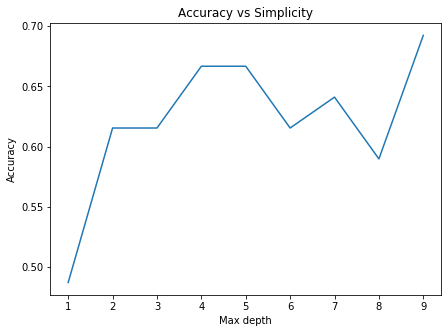

In [401]:
import matplotlib.pylab as plt

plt.figure(figsize=(7,5))
plt.plot(range(1,10),OS)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity")
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [402]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth':range(1,10)}
dt=DecisionTreeClassifier(random_state = 111)
gr=GridSearchCV(dt,param_grid=param_grid)
rs=gr.fit(X_train,y_train)
print (rs.best_params_)
print ("Out of sample accuracy",rs.score(X_test,y_test))


{'max_depth': 3}
Out of sample accuracy 0.6153846153846154


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [403]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print (thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 2349.5, samples = 91, value = [22, 21, 24, 24], class = low", fillcolor="#ffffff"] ;
1 [label="SustAccImprSanRur <= 0.421, samples = 34, value = [21, 13, 0, 0], class = awful", fillcolor="#f5cfb4"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="SustAccImprWatRur <= 0.792, samples = 28, value = [21, 7, 0, 0], class = awful", fillcolor="#eeab7b"] ;
1 -> 2 ;
3 [label="samples = 25, value = [21, 4, 0, 0], class = awful", fillcolor="#ea995f"] ;
2 -> 3 ;
4 [label="samples = 3, value = [0, 3, 0, 0], class = high", fillcolor="#47e539"] ;
2 -> 4 ;
5 [label="samples = 6, value = [0, 6, 0, 0], class = high", fillcolor="#47e539"] ;
1 -> 5 ;
6 [label="AdultLtrcyRate <= 0.934, samples = 57, value = [1, 8, 24, 24], class = low", fillcolor="#ffffff"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [label="Ex

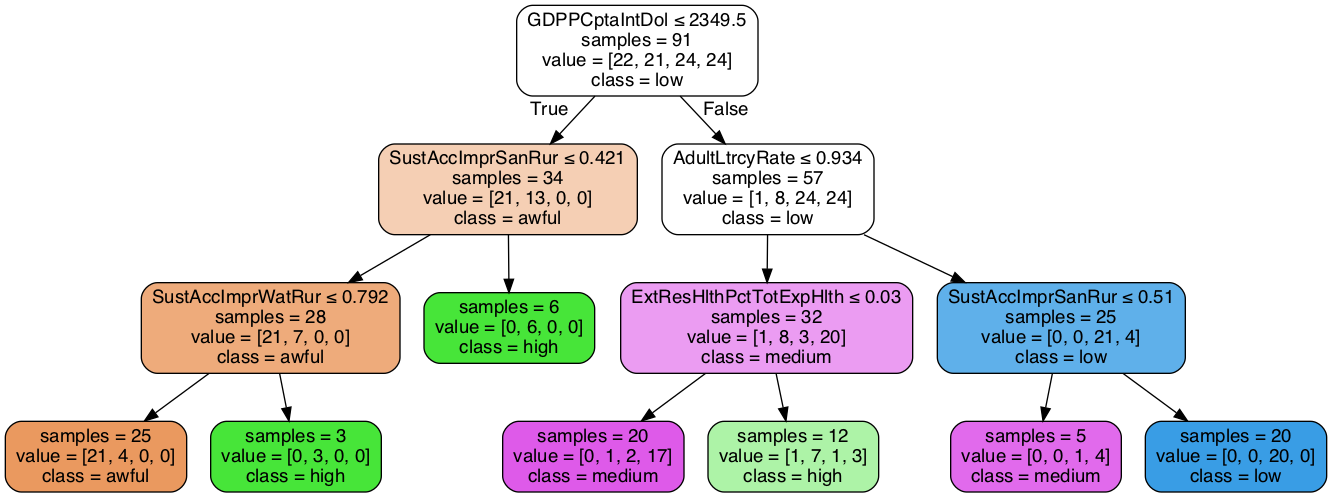

In [404]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [421]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators':range(1,10)}
rf = RandomForestClassifier(n_jobs=-1,max_depth=10, random_state=111)
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(X_train,y_train)
score=rs.score(X_test,y_test)
print (rs.best_params_)
print ("OS score is:",score)



{'n_estimators': 8}
OS score is: 0.6666666666666666


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

Random Forest gives an out of sample accuracy of 0.666 where as decision tree out of Sample accuracy = 0.615. Hence, Random forest has a higher accuracy than decision trees. Decisiom Tree is much easier to interpret and visualize as shown above in Q3(d) where as in random forest it is very difficult to do so.